In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import pandas as pd

In [2]:
data = {}
data_list = ['solTestX', 'solTestY', 'solTrainX', 'solTrainY']

for i in data_list:
    data[i] = pd.read_csv('./data/' + i + '.csv', index_col=0)
    
print("Data Loaded")

Data Loaded


In [6]:
train_data = data['solTrainX']
train_label = data['solTrainY']
test_data = data['solTrainX']
test_label = data['solTrainY']

In [11]:
train_x, train_y = torch.from_numpy(train_data.values).float(), torch.from_numpy(train_label.values).float()

In [13]:
train_x.shape, train_y.shape

(torch.Size([951, 228]), torch.Size([951, 1]))

In [14]:
model = nn.Linear(228, 1, bias=True)
model

Linear(in_features=228, out_features=1, bias=True)

In [15]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [16]:
for step in range(50000):
    pre = model(train_x)
    cost = loss(pre, train_y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5000 == 0:
        print("Step: ", step, ", Cost: ", cost.item())

Step:  0 , Cost:  9.080552101135254
Step:  5000 , Cost:  1.750251054763794
Step:  10000 , Cost:  1.548699975013733
Step:  15000 , Cost:  1.4177272319793701
Step:  20000 , Cost:  1.309865117073059
Step:  25000 , Cost:  1.2192325592041016
Step:  30000 , Cost:  1.142410397529602
Step:  35000 , Cost:  1.076843023300171
Step:  40000 , Cost:  1.0205320119857788
Step:  45000 , Cost:  0.9718777537345886


In [29]:
test_x, test_y = torch.from_numpy(test_data.values).float(), torch.from_numpy(test_label.values).float()

In [30]:
prediction = model(test_x)

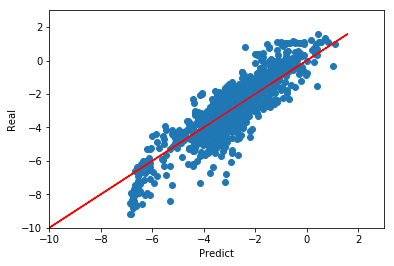

In [34]:
plt.scatter(prediction.data.numpy(), test_y.data.numpy())
plt.plot(test_y.data.numpy(), test_y.data.numpy(), 'r-')
plt.xlabel('Predict')
plt.ylabel('Real')
plt.xlim(-10, 3)
plt.ylim(-10,3)
plt.show()

In [35]:
from sklearn import metrics

In [36]:
print("R2 Score = ", metrics.r2_score(test_y.data, prediction.data))

R2 Score =  0.777840111071084
